In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.precision", 2)

In [2]:
kr = pd.read_csv('Korean.csv')
kr

,Title,Year,Rating,Votes:,Time,Genre,Stars,Short Story
0,Hellbound,(2021– ),6.7,"14,032",150 min,"Crime, Drama, Fantasy","Yoo Ah-in, Kim Hyun-joo, Jeong Min Park, Jin-a...",\nPeople hear predictions on when they will di...
1,Squid Game,(2021– ),8.1,"339,931",55 min,"Action, Drama, Mystery","Lee Jung-jae, Park Hae-soo, Wi Ha-Joon, Jung H...",\nHundreds of cash-strapped players accept a s...
2,My Name,(2021– ),7.9,"12,877",50 min,"Action, Crime, Drama","Hee-soon Park, Ahn Bo-Hyun, Han So-hee, Kim Sa...",\nThe story about a woman who joins an organiz...
3,Miraculous: Tales of Ladybug & Cat Noir,(2015– ),7.7,"9,439",20 min,"Animation, Action, Adventure","Cristina Valenzuela, Bryce Papenbrook, Keith S...","\nMarinette and Adrien, two normal teens, tran..."
4,Happiness,(2021– ),8.6,921,-,"Action, Fantasy, Thriller","Han Hyo-joo, Park Hyung-Sik, Woo-jin Jo, Lee J...",\nAn apocalyptic thriller that takes place in ...
...,...,...,...,...,...,...,...,...
1984,Untitled K-Pop Latin American Project,NaN,-,-,-,Reality-TV,-,\nYoung men from Latin America audition for an...
1985,Bite Sisters,(2021),7.4,5,-,"Fantasy, Romance","Kang Han-na, Kim Yeong-Ah, Yu-hwa Choi, Lee Si...",\nThis story follows Han Yi Na a vampire who s...
1986,Adult Trainee,(2021– ),7.1,10,-,"Comedy, Romance","Mi-Yeon Cho, Ryu Eui-Hyun, Lee Chan Hyung, Yoo...",\nAdd a Plot\n
1987,A good supper,(2021),-,-,-,Romance,-,\nAdd a Plot\n


In [134]:
# From the given Korean data file, compare the number of movies of the following genres – Comedy, Romance, Drama, Fantastic and Thriller – in each year during 2016 to 2021 using an appropriate chart.Also show on the same chart the average rating of movies of each genre in each year.


# # From the given Korean data file, compare the number of movies of the following genres – Comedy, Romance, Drama, Fantastic and Thriller
df = kr[["Year","Genre","Rating"]]
df


,Year,Genre,Rating
0,(2021– ),"Crime, Drama, Fantasy",6.7
1,(2021– ),"Action, Drama, Mystery",8.1
2,(2021– ),"Action, Crime, Drama",7.9
3,(2015– ),"Animation, Action, Adventure",7.7
4,(2021– ),"Action, Fantasy, Thriller",8.6
...,...,...,...
1984,NaN,Reality-TV,-
1985,(2021),"Fantasy, Romance",7.4
1986,(2021– ),"Comedy, Romance",7.1
1987,(2021),Romance,-


In [5]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

/var/folders/tr/sjr4bh_d1sj6dyxjdxkhc1680000gn/T/ipykernel_51912/2737348053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')


In [6]:
pd.unique(df["Year"])

array(['(2021– )', '(2015– )', '(2010–2018)', '(2019– )', '(2020– )',
       '(2019–2020)', '(2020)', '(2016–2017)', '(2007–2015)',
       '(2020–2021)', '(2005–2014)', '(2018)', '(2002–2007)', '(2017– )',
       '(2019)', '(2016)', '(2021)', '(2017)', '(2015–2016)',
       '(1987–1996)', '(2018– )', '(2022– )', '(2003–2010)', '(2009)',
       '(2017–2018)', '(2013–2014)', '(2013)', '(2018–2019)',
       '(1984–1987)', '(2014–2015)', '(2017–2021)', '(2019–2021)',
       '(2003–2005)', '(2010– )', '(1991–1995)', '(2016–2018)',
       '(2017–2019)', '(2016–2020)', '(2008–2010)', '(2015)',
       '(2010–2011)', '(2007)', '(1988–1990)', '(2001–2014)', '(2014)',
       '(2011)', '(1993–1996)', '(2012)', '(2016–2021)', '(2011–2012)',
       '(2006–2019)', '(2018–2021)', '(2004–2008)', '(2021–2022)',
       '(2003–2004)', '(2009–2013)', '(I) (2019–2020)', '(1993–1994)',
       '(2010)', '(2007–2010)', '(2001–2003)', '(2004)', '(2009–2012)',
       '(2005)', '(2011–2022)', '(2016– )', '(2014– 

In [7]:
len(pd.unique(df["Year"]))

174

In [121]:
def count_value(df1):
    cols = {"Comedy":0,"Romance":0,"Drama":0,"Fantastic":0,"Thriller":0}
    df1 = df1.groupby("Genre").count()
    for i in cols.keys(): 
        if i in df1.index: 
            cols[i] = df1.loc[i].mean()
    return cols

x = count_value(df1) 
print(x)
y = get_mean(df1) 

{'Comedy': 1.0, 'Romance': 1.0, 'Drama': 18.0, 'Fantastic': 0, 'Thriller': 1.0}
Genre                      Year    Rating
-                          (2016)  -         9
Action, Comedy, Drama      (2016)  8.3       1
Action, Drama              (2016)  7.0       1
Biography, Drama, History  (2016)  7.8       1
Comedy                     (2016)  7.6       1
Comedy, Crime, Drama       (2016)  7.4       1
                                   7.9       1
Comedy, Drama              (2016)  5.7       1
                                   6.9       1
                                   8.3       1
Comedy, Drama, Fantasy     (2016)  7.4       1
Comedy, Drama, Romance     (2016)  6.7       2
                                   7.0       1
                                   7.5       1
                                   7.7       1
                                   7.8       1
Comedy, Fantasy, Romance   (2016)  7.6       1
                                   7.8       1
Comedy, Romance            (2016

In [9]:
# concat the dataframes and rateing in each year

dfc = pd.concat([df1c, df2c, df3c, df4c, df5c, df6c], ignore_index=True)
dfr = pd.concat([df1r, df2r, df3r, df4r, df5r, df6r], ignore_index=True)
dfd = pd.concat([df1d, df2d, df3d, df4d, df5d, df6d], ignore_index=True)
dff = pd.concat([df1f, df2f, df3f, df4f, df5f, df6f], ignore_index=True)
dft = pd.concat([df1t, df2t, df3t, df4t, df5t, df6t], ignore_index=True)


In [74]:
print(dfc[dfc["Year"] == "(2016)"]["Rating"])
dfc = dfc[dfc["Year"] == "(2016)" ]
dfc["Rating"] = dfc["Rating"].astype(float) 
sumrate = dfc["Rating"].sum()
sumrate

NameError: name 'dfc' is not defined

In [11]:
# mean of rating in 2016

dfc16 = dfc[dfc["Year"] == "(2016)" ]
dfr16 = dfr[dfr["Year"] == "(2016)" ]
dfd16 = dfd[dfd["Year"] == "(2016)" ]
dff16 = dff[dff["Year"] == "(2016)" ]
dft16 = dft[dft["Year"] == "(2016)" ]

meanratec16 = dfc16["Rating"].mean()
meanrater16 = dfr16["Rating"].mean()
meanrated16 = dfd16["Rating"].mean()
meanratef16 = dff16["Rating"].mean()
meanratet16 = dft16["Rating"].mean()

In [12]:
# mean of rating in 2017

dfc17 = dfc[dfc["Year"] == "(2017)" ]
dfr17 = dfr[dfr["Year"] == "(2017)" ]
dfd17 = dfd[dfd["Year"] == "(2017)" ]
dff17 = dff[dff["Year"] == "(2017)" ]
dft17 = dft[dft["Year"] == "(2017)" ]

meanratec16 = dfc17["Rating"].mean()
meanrater16 = dfr17["Rating"].mean()
meanrated16 = dfd17["Rating"].mean()
meanratef16 = dff17["Rating"].mean()
meanratet16 = dft17["Rating"].mean()

In [13]:
# mean of rating in 2018

dfc18 = dfc[dfc["Year"] == "(2018)" ]
dfr18 = dfr[dfr["Year"] == "(2018)" ]
dfd18 = dfd[dfd["Year"] == "(2018)" ]
dff18 = dff[dff["Year"] == "(2018)" ]
dft18 = dft[dft["Year"] == "(2018)" ]

meanratec18 = dfc18["Rating"].mean()
meanrater18 = dfr18["Rating"].mean()
meanrated18 = dfd18["Rating"].mean()
meanratef18 = dff18["Rating"].mean()
meanratet18 = dft18["Rating"].mean()

In [14]:
# mean of rating in 2019

dfc19 = dfc[dfc["Year"] == "(2019)" ]
dfr19 = dfr[dfr["Year"] == "(2019)" ]
dfd19 = dfd[dfd["Year"] == "(2019)" ]
dff19 = dff[dff["Year"] == "(2019)" ]
dft19 = dft[dft["Year"] == "(2019)" ]

meanratec19 = dfc19["Rating"].mean()
meanrater19 = dfr19["Rating"].mean()
meanrated19 = dfd19["Rating"].mean()
meanratef19 = dff19["Rating"].mean()
meanratet19 = dft19["Rating"].mean()

In [15]:
# mean of rating in 2020

dfc20 = dfc[dfc["Year"] == "(2020)" ]
dfr20 = dfr[dfr["Year"] == "(2020)" ]
dfd20 = dfd[dfd["Year"] == "(2020)" ]
dff20 = dff[dff["Year"] == "(2020)" ]
dft20 = dft[dft["Year"] == "(2020)" ]

meanratec20 = dfc20["Rating"].mean()
meanrater20 = dfr20["Rating"].mean()
meanrated20 = dfd20["Rating"].mean()
meanratef20 = dff20["Rating"].mean()
meanratet20 = dft20["Rating"].mean()

In [16]:
# mean of rating in 2021

dfc21 = dfc[dfc["Year"] == "(2021)" ]
dfr21 = dfr[dfr["Year"] == "(2021)" ]
dfd21 = dfd[dfd["Year"] == "(2021)" ]
dff21 = dff[dff["Year"] == "(2021)" ]
dft21 = dft[dft["Year"] == "(2021)" ]

meanratec21 = dfc21["Rating"].mean()
meanrater21 = dfr21["Rating"].mean()
meanrated21 = dfd21["Rating"].mean()
meanratef21 = dff21["Rating"].mean()
meanratet21 = dft21["Rating"].mean()

In [17]:
Comedy16 = dfc[dfc["Year"] == "(2016)"].count()
Comedy17 = dfc[dfc["Year"] == "(2017)"].count()
Comedy18 = dfc[dfc["Year"] == "(2018)"].count()
Comedy19 = dfc[dfc["Year"] == "(2019)"].count()
Comedy20 = dfc[dfc["Year"] == "(2020)"].count()
Comedy21 = dfc[dfc["Year"] == "(2021)"].count()

In [18]:
Romance16 = dfr[dfr["Year"] == "(2016)"].count()
Romance17 = dfr[dfr["Year"] == "(2017)"].count()
Romance18 = dfr[dfr["Year"] == "(2018)"].count()
Romance19 = dfr[dfr["Year"] == "(2019)"].count()
Romance20 = dfr[dfr["Year"] == "(2020)"].count()
Romance21 = dfr[dfr["Year"] == "(2021)"].count()

In [19]:
Drama16 = dfd[dfd["Year"] == "(2016)"].count()
Drama17 = dfd[dfd["Year"] == "(2017)"].count()
Drama18 = dfd[dfd["Year"] == "(2018)"].count()
Drama19 = dfd[dfd["Year"] == "(2019)"].count()
Drama20 = dfd[dfd["Year"] == "(2020)"].count()
Drama21 = dfd[dfd["Year"] == "(2021)"].count()

In [20]:
Fantasy16 = dff[dff["Year"] == "(2016)"].count()
Fantasy17 = dff[dff["Year"] == "(2017)"].count()
Fantasy18 = dff[dff["Year"] == "(2018)"].count()
Fantasy19 = dff[dff["Year"] == "(2019)"].count()
Fantasy20 = dff[dff["Year"] == "(2020)"].count()
Fantasy21 = dff[dff["Year"] == "(2021)"].count()

In [21]:
Thriller16 = dft[dft["Year"] == "(2016)"].count()
Thriller17 = dft[dft["Year"] == "(2017)"].count()
Thriller18 = dft[dft["Year"] == "(2018)"].count()
Thriller19 = dft[dft["Year"] == "(2019)"].count()
Thriller20 = dft[dft["Year"] == "(2020)"].count()
Thriller21 = dft[dft["Year"] == "(2021)"].count()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (3,).

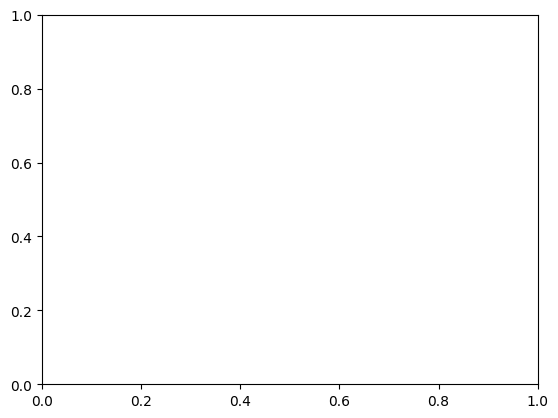

In [26]:
X = ['2016','2017','2018','2019','2020','2021']

ComedyALL = [Comedy16, Comedy17, Comedy18, Comedy19, Comedy20, Comedy21]
RomanceALL = [Romance16, Romance17, Romance18, Romance19, Romance20, Romance21]
DramaALL = [Drama16, Drama17, Drama18, Drama19, Drama20, Drama21]
FantasyALL = [Fantasy16, Fantasy17, Fantasy18, Fantasy19, Fantasy20, Fantasy21]
ThrillerALL = [Thriller16, Thriller17, Thriller18, Thriller19, Thriller20, Thriller21]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.4, ComedyALL, 0.4, label = 'Comedy')
plt.bar(X_axis - 0.2, RomanceALL, 0.4, label = 'Romance')
plt.bar(X_axis + 0  , DramaALL, 0.4, label = 'Drama')
plt.bar(X_axis + 0.2, FantasyALL, 0.4, label = 'Fantasy')
plt.bar(X_axis + 0.4, ThrillerALL, 0.4, label = 'Thriller')


plt.xticks(X_axis, X)
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Number of Movies in Each Year")
plt.legend()
plt.show()

In [ ]:
# Side-by-side bar chart


plt.bar(dfc["Year"], dfc["Rating"], color='green', width=0.5)
plt.bar(dfr["Year"], dfr["Rating"], color='red', width=0.5)
plt.bar(dfd["Year"], dfd["Rating"], color='blue', width=0.5)
plt.bar(dff["Year"], dff["Rating"], color='yellow', width=0.5)
plt.bar(dft["Year"], dft["Rating"], color='black', width=0.5)



In [ ]:
# plt.plot(dfc["Year"], label="Comedy", color="red")
# plt.plot(dfc["Rating"], label="Comedy", color="blue")
